In [1]:
!date

Thu Nov 17 17:51:40 PST 2022


In [2]:
!sudo timedatectl set-timezone America/Los_Angeles
!date

Thu Nov 17 17:51:41 PST 2022


In [3]:
!sudo apt update

Hit:2 http://packages.cloud.google.com/apt cloud-sdk-buster InRelease          
Hit:3 http://packages.cloud.google.com/apt google-cloud-packages-archive-keyring-buster InRelease
Hit:4 http://packages.cloud.google.com/apt gcsfuse-buster InRelease            
Hit:5 https://packages.cloud.google.com/apt google-fast-socket InRelease       
Hit:6 http://packages.cloud.google.com/apt google-compute-engine-buster-stable InRelease
Get:7 https://nvidia.github.io/libnvidia-container/stable/debian10/amd64  InRelease [1484 B]
Hit:8 http://deb.debian.org/debian buster InRelease                            
Get:9 https://nvidia.github.io/nvidia-container-runtime/stable/debian10/amd64  InRelease [1481 B]
Hit:10 http://security.debian.org/debian-security buster/updates InRelease     
Hit:11 https://download.docker.com/linux/debian buster InRelease               
Get:12 https://nvidia.github.io/nvidia-docker/debian10/amd64  InRelease [1474 B]
Hit:13 http://deb.debian.org/debian buster-updates InRelease 

In [4]:
# Ensure compatibility
from __future__ import absolute_import, division, print_function

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import TensorFlow and Keras packages
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)

2.8.2


In [5]:
data1 = pd.read_csv("SupplyChainDataRev4.csv", skiprows = 0)

In [6]:
data1.head()

,SupplierID,ForeignMainland,Cycletime,Location,Class,DefectRate,Cost,ClassLabel,CycNorm,DefNorm,CosNorm
0,7503961,U,49.0,D,Gold,4.0,5.0,1,0.620253,0.129032,0.138889
1,3209120,F,70.0,D,Silver,5.0,8.0,2,0.886076,0.161290,0.222222
2,1783896,M,NaN,C,Silver,5.0,1.0,2,0.000000,0.161290,0.027778
3,9060334,NaN,49.0,D,Tin,7.0,7.0,3,0.620253,0.225806,0.194444
4,3571171,F,66.0,F,Silver,9.0,12.0,2,0.835443,0.290323,0.333333


In [7]:
data1.tail()

,SupplierID,ForeignMainland,Cycletime,Location,Class,DefectRate,Cost,ClassLabel,CycNorm,DefNorm,CosNorm
4995,6182552,F,68.0,B,Silver,6.0,17.0,2,0.860759,0.193548,0.472222
4996,644048,F,NaN,B,Silver,8.0,4.0,2,0.000000,0.258065,0.111111
4997,8498615,F,31.0,C,Tin,15.0,5.0,3,0.392405,0.483871,0.138889
4998,4229294,NaN,41.0,D,Tin,7.0,8.0,3,0.518987,0.225806,0.222222
4999,2698566,M,33.0,F,Tin,14.0,8.0,3,0.417722,0.451613,0.222222


In [8]:
data1nparray = data1.values

In [9]:
# Define independent variables
TrainData   = data1nparray[:, [8, 9, 10]]
# Define dependent variable
TrainLabels = data1nparray[:, [7]]

In [10]:
TrainDataFloat = TrainData.astype(float)

In [11]:
TrainDataFloat

array([[0.62025317, 0.12903226, 0.13888889],
       [0.88607595, 0.16129032, 0.22222222],
       [0.        , 0.16129032, 0.02777778],
       ...,
       [0.39240506, 0.48387097, 0.13888889],
       [0.51898734, 0.22580645, 0.22222222],
       [0.41772152, 0.4516129 , 0.22222222]])

In [12]:
TrainLabelsInt = TrainLabels.astype(int)

In [13]:
TrainLabelsInt

array([[1],
       [2],
       [2],
       ...,
       [3],
       [3],
       [3]])

In [14]:
model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

2022-11-17 17:52:06.838782: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
model.compile(
              optimizer='adam', 
#             optimizer='sgd', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
model.fit(TrainDataFloat, TrainLabelsInt, epochs=20)

Epoch 1/20
157/157 [==============================] - 1s 3ms/step - loss: 1.3409 - accuracy: 0.3356
Epoch 2/20
157/157 [==============================] - 0s 3ms/step - loss: 1.2371 - accuracy: 0.3948
Epoch 3/20
157/157 [==============================] - 0s 3ms/step - loss: 1.1983 - accuracy: 0.3946
Epoch 4/20
157/157 [==============================] - 0s 3ms/step - loss: 1.1845 - accuracy: 0.3910
Epoch 5/20
157/157 [==============================] - 1s 5ms/step - loss: 1.1727 - accuracy: 0.3960
Epoch 6/20
157/157 [==============================] - 1s 3ms/step - loss: 1.1610 - accuracy: 0.4084
Epoch 7/20
157/157 [==============================] - 0s 3ms/step - loss: 1.1488 - accuracy: 0.4246
Epoch 8/20
157/157 [==============================] - 0s 3ms/step - loss: 1.1377 - accuracy: 0.4384
Epoch 9/20
157/157 [==============================] - 1s 3ms/step - loss: 1.1266 - accuracy: 0.4468
Epoch 10/20
157/157 [==============================] - 0s 3ms/step - loss: 1.1187 - accuracy: 0.4520

In [17]:
train_loss, train_acc = model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc)


157/157 [==============================] - 1s 4ms/step - loss: 1.0844 - accuracy: 0.4772
Train accuracy: 0.4772000014781952


In [18]:
predictions = model.predict(TrainDataFloat)


In [19]:
class_names = ['Platinum', 'Gold', 'Silver', 'Tin']


In [20]:
print(len(predictions[0]))
print(len(class_names))

4
4


In [21]:
def plot_image(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label[i][0]:
    TextColor = 'blue'
  else:
    TextColor = 'red'
  
  plt.xlabel("{} {:2.0f}% ({})".format(
                                  class_names[predicted_label],
                                  100*np.max(predictions_array[i]),
                                  class_names[true_label[i][0]]
                                  ),
                                color=TextColor)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(True)
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array[i])
  thisplot = plt.bar(range(len(predictions_array[0])), predictions_array[i], color="#777777")
  
  # if the true label equals the predicted label, then the blue color will overwrite the red color
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i][0]].set_color('blue')


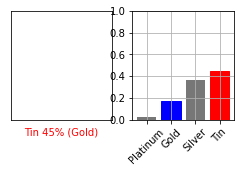

In [22]:
i = 0
# width, height
plt.figure(figsize=(4,2))

# nrows, ncols, index
plt.subplot(1,2,1)
# Create summary plot on left side
plot_image(i, predictions, TrainLabelsInt)
# nrows, ncols, index
plt.subplot(1,2,2)
# Create bar plot on right side
plot_value_array(i, predictions, TrainLabelsInt)
# Label X axis with classification names
plt.xticks(range(len(predictions[0])), class_names, rotation=45)
# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [23]:
predictions[0]


array([0.02656112, 0.16892967, 0.35912564, 0.44538358], dtype=float32)

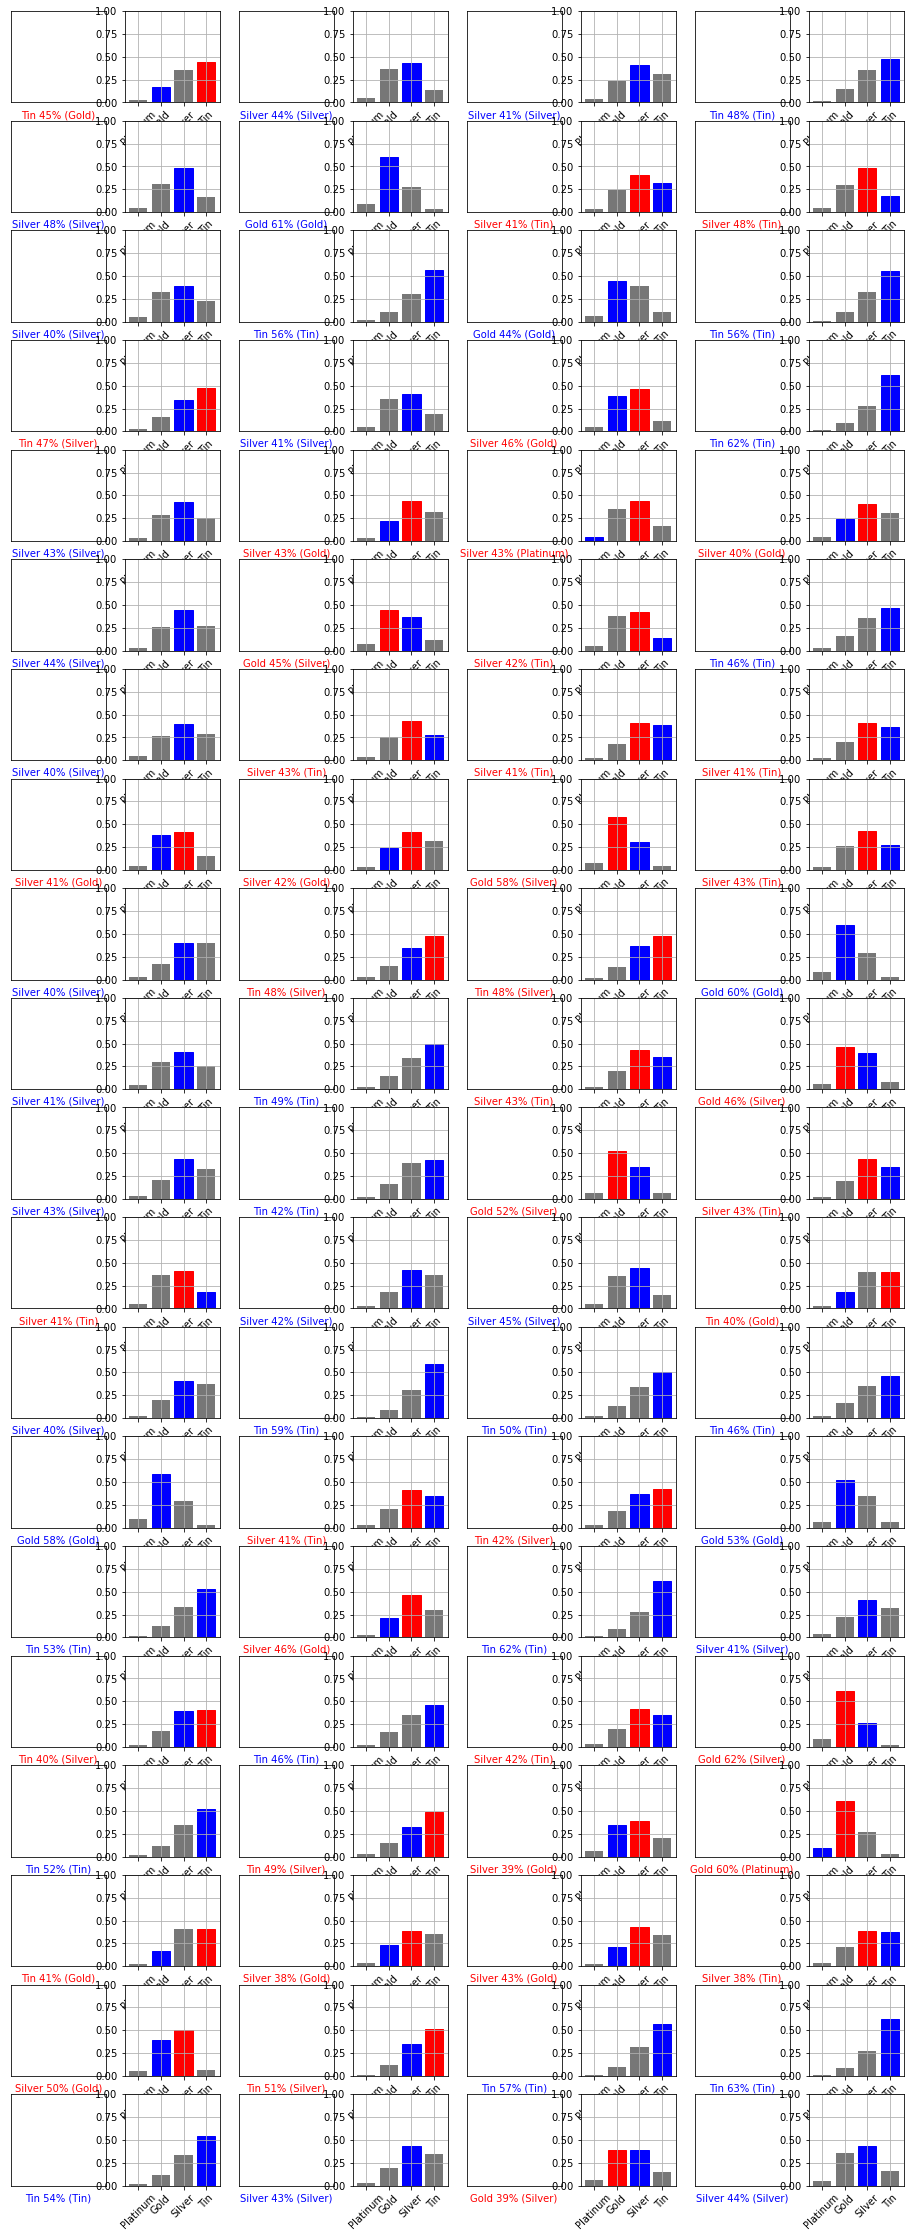

In [24]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
# width, height
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Create each plot
for i in range(num_images):
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Create summary plot on left side
  plot_image(i, predictions, TrainLabelsInt)
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Create bar plot on right side
  plot_value_array(i, predictions, TrainLabelsInt)
  # Label X axis with classification names
  plt.xticks(range(len(predictions[0])), class_names, rotation=45)

# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [25]:
layer0 = model.get_layer(index=0)


In [26]:
layer0.get_weights()

[array([[ 0.65244186, -0.20659493, -0.28126374, -0.02856153, -0.21176302,
         -0.8688173 , -0.7760182 , -0.35712656, -0.26359886, -0.17164616,
         -0.45239267,  0.6333329 , -0.03861983,  0.11367504,  0.38531277,
         -0.2050102 ],
        [ 0.43743473,  0.3740782 , -0.06293946, -0.09480724, -0.2894758 ,
          0.14931393,  0.12401838, -0.47851723,  0.37137076,  0.2978765 ,
         -0.01701796, -0.06563192, -0.37815332, -0.03401156, -0.01511569,
         -0.04640435],
        [-1.0883721 ,  0.7334717 ,  0.34875834, -0.4049136 , -0.18906248,
          0.1514357 ,  0.2440691 , -0.5305059 ,  1.0548191 ,  0.48637006,
         -0.0017596 ,  0.4796088 ,  0.41730794,  1.0820347 , -0.96054655,
          1.0107585 ]], dtype=float32),
 array([-0.235046  ,  0.37164357,  0.02120284,  0.        ,  0.        ,
         0.33671394,  0.26279256,  0.        ,  0.26066038,  0.3696948 ,
        -0.00600332,  0.19555834, -0.07264107, -0.23063795, -0.06362309,
        -0.02737656], dtype=f

In [27]:
layer1 = model.get_layer(index=1)

In [28]:
layer1.get_weights()

[array([[-0.3360771 , -0.98858654, -1.0874289 ,  0.82533425, -0.33957127,
          0.47252455, -0.11963725,  0.92105263],
        [-0.12441754,  0.77994484,  0.40185842, -0.36618754, -0.46206015,
          0.24749364, -0.40337455, -0.02865528],
        [-0.31778276,  0.5612555 ,  0.54092455, -0.44027624, -0.24386604,
         -0.5304722 ,  0.06781518, -0.46975964],
        [-0.18074071,  0.35385394,  0.03684771,  0.24517858,  0.19370115,
         -0.3322271 ,  0.156618  ,  0.2667519 ],
        [-0.23397684,  0.06312108, -0.06461763, -0.04111171, -0.43378806,
         -0.1664567 , -0.05101502, -0.08701837],
        [ 0.06229568, -0.8637399 , -0.26129627,  0.10180122,  0.23290162,
          1.0304589 , -0.26935315,  0.6587126 ],
        [-0.4157853 , -0.4055748 , -0.48705631,  0.1792663 ,  0.18795785,
         -0.11623743,  0.38402188,  0.4215738 ],
        [-0.06804729,  0.42972696, -0.17357683, -0.00886035,  0.37478828,
         -0.41647577,  0.38799238, -0.42200243],
        [-0.4437

In [29]:
layer2 = model.get_layer(index=2)

In [30]:
layer2.get_weights()

[array([[ 0.64175755, -0.3928071 , -0.39985135,  0.0211063 ],
        [-1.0750766 , -0.5592215 , -0.04463674,  0.3687038 ],
        [-0.5623999 , -0.7839982 ,  0.2004849 ,  1.2902749 ],
        [ 0.8614194 ,  0.57321995, -0.3313752 , -2.0578806 ],
        [ 0.08895328, -0.57803255,  0.25792456, -0.9641846 ],
        [-0.66097075,  0.8134041 ,  0.30861217, -0.5822661 ],
        [ 0.46674818,  0.06365913, -0.4372083 ,  0.07983387],
        [ 0.37897658,  0.351131  ,  0.1411916 , -0.9880677 ]],
       dtype=float32),
 array([-0.32407996,  0.1590773 ,  0.14749491,  0.11318172], dtype=float32)]

In [31]:
# Create data frame that contains predictions
predictionsDF = pd.DataFrame(
    data=predictions,
    columns=class_names
    )


In [32]:
# Create external file that contains the predictions
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=True, index=False)


In [33]:
# Create one-dimensional array
TrainLabelsInt1D = np.ndarray.copy(TrainLabelsInt[:,0])

# Determine predicted outcomes and whether predicted outcomes equal actual outcomes
PredictedLabels1D   = np.ndarray.copy(TrainLabelsInt1D)
PredictedOutcomes1D = np.ndarray.copy(TrainLabelsInt1D)
for i in range(len(TrainLabelsInt1D)):
    PredictedLabels1D[i] = np.argmax(predictions[i])
    if PredictedLabels1D[i] == TrainLabelsInt1D[i]:
        PredictedOutcomes1D[i] = 1
    else:
        PredictedOutcomes1D[i] = 0

In [34]:
TrainLabelsInt1D

array([1, 2, 2, ..., 3, 3, 3])

In [35]:
PredictedLabels1D

array([3, 2, 2, ..., 3, 3, 3])

In [36]:
PredictedOutcomes1D

array([0, 1, 1, ..., 1, 1, 1])

In [37]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
tf.math.confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
    )

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[   0,   87,   92,   12],
       [   0,  510,  683,  171],
       [   0,  412, 1010,  552],
       [   0,   65,  540,  866]], dtype=int32)>

In [38]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
from sklearn.metrics import confusion_matrix

ClassificationMatrix = confusion_matrix(
    TrainLabelsInt1D, 
    PredictedLabels1D
    )
print('Classification Matrix')
print(ClassificationMatrix)

Classification Matrix
[[   0   87   92   12]
 [   0  510  683  171]
 [   0  412 1010  552]
 [   0   65  540  866]]


In [39]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(TrainLabelsInt1D, PredictedLabels1D)))

Accuracy: 0.48


In [40]:
# Sensitivity is also called true positive rate (TPR) or recall
print('Sensitivity: {:.2f}'.format(recall_score(TrainLabelsInt1D, PredictedLabels1D, average='micro')))

Sensitivity: 0.48


In [41]:
# Create two-dimensional array
PredictedLabels2D      = np.ndarray.copy(TrainLabelsInt)
PredictedLabels2D[:,0] = np.ndarray.copy(PredictedLabels1D)

PredictedOutcomes2D      = np.ndarray.copy(TrainLabelsInt)
PredictedOutcomes2D[:,0] = np.ndarray.copy(PredictedOutcomes1D)

In [42]:
PredictedLabels1D

array([3, 2, 2, ..., 3, 3, 3])

In [43]:
PredictedLabels2D

array([[3],
       [2],
       [2],
       ...,
       [3],
       [3],
       [3]])

In [44]:
PredictedOutcomes1D

array([0, 1, 1, ..., 1, 1, 1])

In [45]:
PredictedOutcomes2D

array([[0],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [46]:
TrainDataLabels                        = np.append(TrainDataFloat, TrainLabelsInt, axis=1)
TrainDataLabelsPredictions             = np.append(TrainDataLabels, PredictedLabels2D, axis=1)
TrainDataLabelsPredictionsOutcomes     = np.append(TrainDataLabelsPredictions, PredictedOutcomes2D, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)

In [47]:
# Define header
HeaderNames = ['CycNorm', 'DefNorm', 'CosNorm', 'ClassLabelActual', 'ClassLabelPrediction', 'ClassLabelAccurate',
    'PlatinumProbability', 'GoldProbability', 'SilverProbability', 'TinProbability']

# Create data frame
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb,
    columns=HeaderNames
    )

In [48]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=True, index=False)

In [52]:
# Create directory to save model
!mkdir -p Models

In [53]:
# Save model
tf.keras.models.save_model(
    model,
    "Models",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )

INFO:tensorflow:Assets written to: Models/assets


In [54]:
# Load saved model
new_model = tf.keras.models.load_model("Models")


In [55]:
# Print summary of original model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [56]:
# Print summary of loaded model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 236
Trainable params: 236
Non-trainable params: 0
_________________________________________________________________


In [57]:
#CycNorm, DefNorm, CosNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[0.9, 0.9, 0.9]])
SingleObservationFloat = SingleObservation.astype(float)

SinglePrediction         = model.predict(SingleObservationFloat)
SinglePredictionNewModel = new_model.predict(SingleObservationFloat)

# Print prediction
print(SinglePrediction[0])
print(SinglePredictionNewModel[0])

[0.03837496 0.50948066 0.4445415  0.00760284]
[0.03837496 0.50948066 0.4445415  0.00760284]


In [58]:
SinglePrediction[0]

array([0.03837496, 0.50948066, 0.4445415 , 0.00760284], dtype=float32)

In [59]:
SinglePredictionNewModel[0]

array([0.03837496, 0.50948066, 0.4445415 , 0.00760284], dtype=float32)

In [60]:
np.max(SinglePrediction[0])

0.50948066

In [61]:
np.argmax(SinglePrediction[0])

1

In [62]:
class_names[np.argmax(SinglePrediction[0])]

'Gold'

In [65]:
!date

Thu Nov 17 18:07:01 PST 2022
